In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

import seaborn as sns

import numpy as np

from pprint import pprint

In [2]:
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Hyperparameters

n_estimators = number of trees in the foreset <br>
max_features = max number of features considered for splitting a node <br>
max_depth = max number of levels in each decision tree <br>
min_samples_split = min number of data points placed in a node before the node is split <br>
min_samples_leaf = min number of data points allowed in a leaf node <br>
bootstrap = method for sampling data points (with or without replacement) <br>

In [3]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [4]:
from Zoidberg_Object import ZOIDBERG
zb = ZOIDBERG()
train_features, train_labels, test_features, test_labels = zb.load_data()

100%|██████████| 2/2 [00:09<00:00,  4.51s/it]

Finished in 88.2 s


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [22]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [13]:
best10
# {'n_estimators': 200,
#  'min_samples_split': 10,
#  'min_samples_leaf': 2,
#  'max_features': 'sqrt',
#  'max_depth': 50,
#  'bootstrap': True}

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [14]:
best100
# {'n_estimators': 400,
#  'min_samples_split': 5,
#  'min_samples_leaf': 1,
#  'max_features': 'sqrt',
#  'max_depth': 30,
#  'bootstrap': True}

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [6]:
best10 = {'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [7]:
best100 = {'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [8]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [9]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)
# Model Performance
# Average Error: 3.9199 degrees.
# Accuracy = 93.36%.

Model Performance
Average Error: 0.2723 degrees.
Accuracy = nan%.


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [10]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)
# Model Performance
# Average Error: 3.7152 degrees.
# Accuracy = 93.73%.

NameError: name 'rf_random' is not defined

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
# Improvement of 0.40%.

# Grid search

In [11]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [12]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_
# {'bootstrap': True,
#  'max_depth': 80,
#  'max_features': 3,
#  'min_samples_leaf': 5,
#  'min_samples_split': 12,
#  'n_estimators': 100}

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [15]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
# Model Performance
# Average Error: 3.6561 degrees.
# Accuracy = 93.83%.

Model Performance
Average Error: 0.2885 degrees.
Accuracy = -inf%.


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [17]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
# Improvement of 0.50%.

Improvement of nan%.


## Random forest with Sklearn

In [86]:
import os
import re
import cv2
import time
import graphviz
from tqdm import tqdm
from random import randrange
from sklearn import svm, metrics, tree
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [87]:
def load_data():
    # Start time
    start_time = time.time()
    
    # Définir le chemin du dossier contenant les images d'entraînement et de test
    train_dir = "./Data/chest_Xray/train/"
    test_dir = "./Data/chest_Xray/test/"
    val_dir = "./Data/chest_Xray/val/"

    # Définir le nombre de voisins à utiliser pour la classification K-NN
    # n_neighbors = 5

    # Charger les images d'entraînement et de test, et leurs étiquettes
    train_images = []
    train_labels = []
    for foldername in tqdm(["NORMAL", "PNEUMONIA"]): # os.listdir(train_dir)
        label = 0 if foldername == "NORMAL" else 1
        folderpath = os.path.join(train_dir, foldername)
        for filename in os.listdir(folderpath):
            if filename.endswith(".jpeg"):
                imgpath = os.path.join(folderpath, filename)
                img = cv2.imread(imgpath)
                if img is None:
                    print('Wrong path:', imgpath)
                else:
                    img = cv2.resize(img, (64, 64))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    train_images.append(img.flatten())
                    train_labels.append(label)

    test_images = []
    test_labels = []
    for foldername in tqdm(["NORMAL", "PNEUMONIA"]): # os.listdir(test_dir)
        label = 0 if foldername == "NORMAL" else 1
        folderpath = os.path.join(test_dir, foldername)
        for filename in os.listdir(folderpath):
            if filename.endswith(".jpeg"):
                imgpath = os.path.join(folderpath, filename)
                img = cv2.imread(imgpath)
                if img is None:
                    print('Wrong path:', imgpath)
                else:
                    img = cv2.resize(img, (64, 64))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    test_images.append(img.flatten())
                    test_labels.append(label)
    
    val_images = []
    val_labels = []
    for foldername in tqdm(["NORMAL", "PNEUMONIA"]): # os.listdir(test_dir)
        label = 0 if foldername == "NORMAL" else 1
        folderpath = os.path.join(val_dir, foldername)
        for filename in os.listdir(folderpath):
            if filename.endswith(".jpeg"):
                imgpath = os.path.join(folderpath, filename)
                img = cv2.imread(imgpath)
                if img is None:
                    print('Wrong path:', imgpath)
                else:
                    img = cv2.resize(img, (64, 64))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    val_images.append(img.flatten())
                    val_labels.append(label)
                    
    print("Finished in", round((time.time() - start_time), 1), "s")
                    
    return train_images, train_labels, test_images, test_labels, val_images, val_labels

In [121]:
def random_tree_forest(estimators, max_depth, np_images_training, np_labels_training, np_images_testing, np_labels_testing, random_state=0):
    # n_estimators = + le nombre est grand, + les performances seront bonnes mais le code sera ralenti
    clf = RandomForestClassifier(n_estimators=estimators, max_depth=max_depth, min_samples_split=2, random_state=random_state)
    clf = clf.fit(np_images_training, np_labels_training)

    # scores = cross_val_score(clf, self.np_images_training, self.np_labels_training, cv=5)
    # print(scores.mean())

    # create graph in a pdf
    # take a random tree in the forest and display it !!!
    estimator = clf.estimators_[randrange(estimators)]
    dot_data = export_graphviz(estimator, out_file=None, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("Tree_Forest_Graph")

    # Predict the response for test dataset
    predicted = clf.predict(np_images_testing)
    print("Accuracy:", metrics.accuracy_score(np_labels_testing, predicted))
    print("Confusion matrix:\n", confusion_matrix(np_labels_testing, predicted))
    print("Mean squared error:", mean_squared_error(np_labels_testing, predicted, squared=False))

    # Afficher la matrice de confusion sous forme de graphique avec les étiquettes renommées
    cm = confusion_matrix(np_labels_testing, predicted)
    labels = ["Negative", "Positive"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Matrice de confusion")
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.show()
    
    return metrics.accuracy_score(np_labels_testing, predicted), confusion_matrix(np_labels_testing, predicted), mean_squared_error(np_labels_testing, predicted, squared=False)

In [60]:
train_images, train_labels, test_images, test_labels, val_images, val_labels = load_data()

100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

Finished in 88.6 s


Accuracy: 0.75
Confusion matrix:
 [[ 83 151]
 [  5 385]]
Mean squared error: 0.5


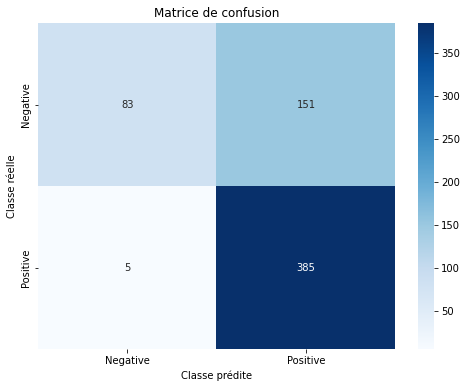

In [ ]:
random_tree_forest(100, 5, train_images, train_labels, test_images, test_labels)

Accuracy: 0.7756410256410257
Confusion matrix:
 [[ 97 137]
 [  3 387]]
Mean squared error: 0.47366546671567095


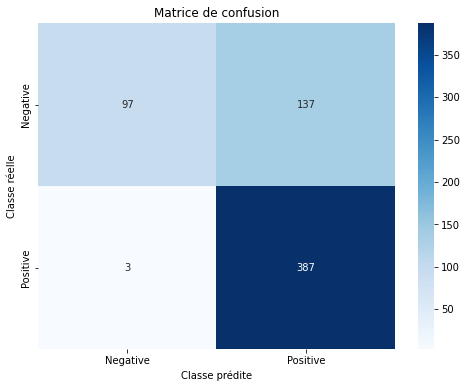

In [114]:
random_tree_forest(100, None, train_images, train_labels, test_images, test_labels)

For i= 0
Accuracy: 0.7756410256410257
Confusion matrix:
 [[ 97 137]
 [  3 387]]
Mean squared error: 0.47366546671567095


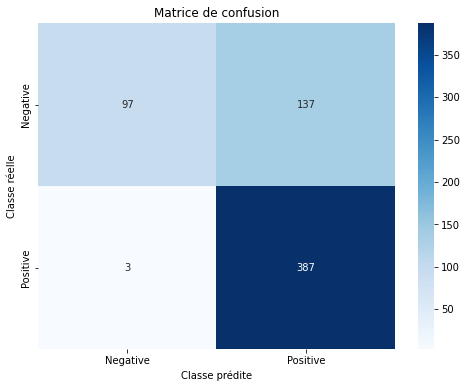

For i= 1
Accuracy: 0.7708333333333334
Confusion matrix:
 [[ 94 140]
 [  3 387]]
Mean squared error: 0.47871355387816905


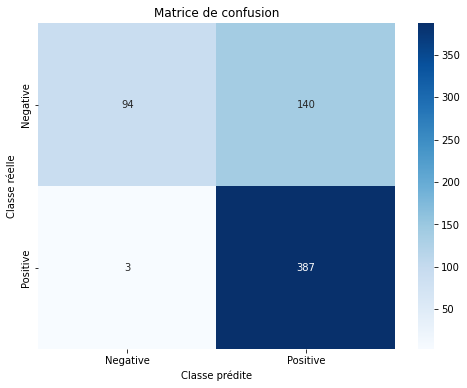

For i= 2
Accuracy: 0.7788461538461539
Confusion matrix:
 [[ 99 135]
 [  3 387]]
Mean squared error: 0.4702699715629801


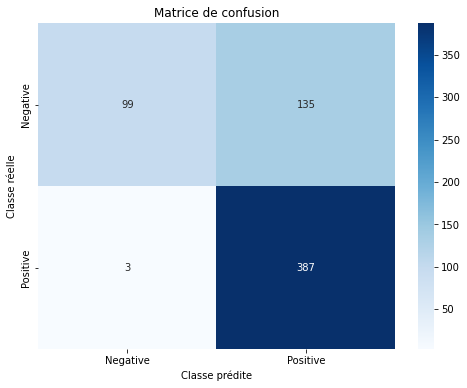

For i= 3
Accuracy: 0.7868589743589743
Confusion matrix:
 [[104 130]
 [  3 387]]
Mean squared error: 0.46167198923156


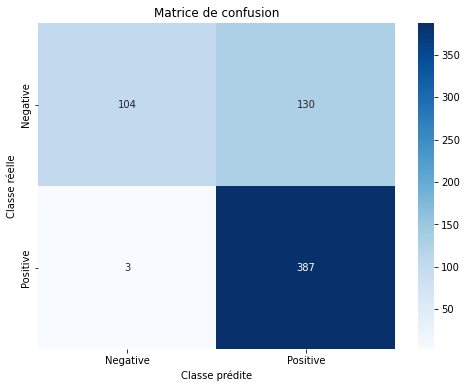

For i= 4
Accuracy: 0.7836538461538461
Confusion matrix:
 [[102 132]
 [  3 387]]
Mean squared error: 0.46513025470953173


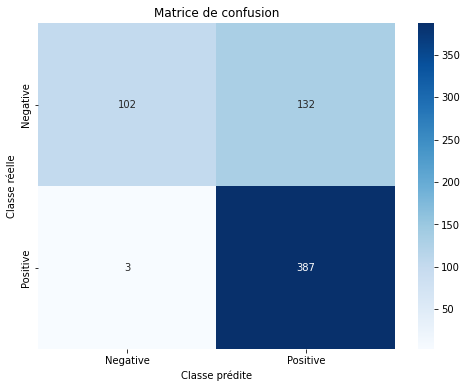

For i= 5
Accuracy: 0.7724358974358975
Confusion matrix:
 [[ 94 140]
 [  2 388]]
Mean squared error: 0.47703679372151425


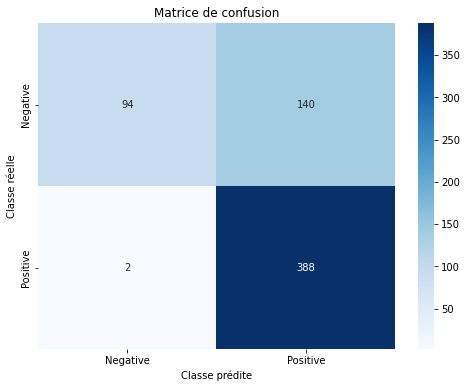

For i= 6
Accuracy: 0.7708333333333334
Confusion matrix:
 [[ 96 138]
 [  5 385]]
Mean squared error: 0.47871355387816905


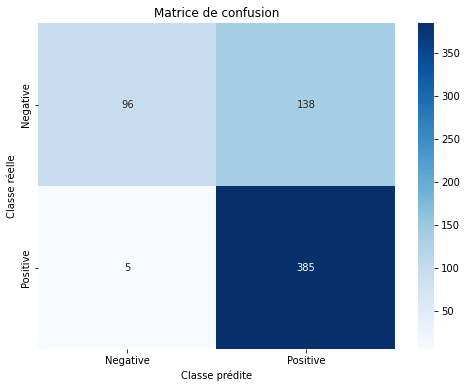

For i= 7
Accuracy: 0.782051282051282
Confusion matrix:
 [[101 133]
 [  3 387]]
Mean squared error: 0.46684978092392626


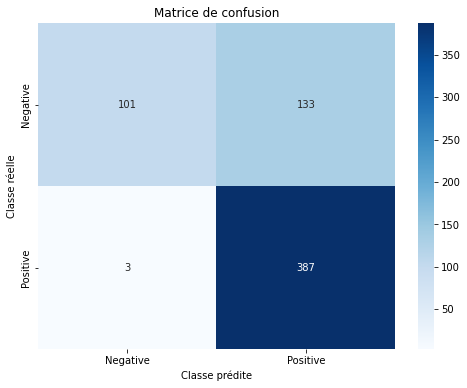

For i= 8
Accuracy: 0.7868589743589743
Confusion matrix:
 [[104 130]
 [  3 387]]
Mean squared error: 0.46167198923156


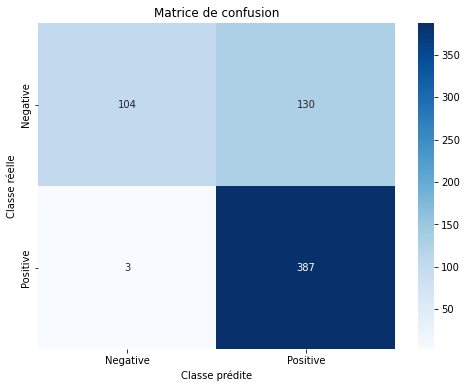

For i= 9
Accuracy: 0.7868589743589743
Confusion matrix:
 [[105 129]
 [  4 386]]
Mean squared error: 0.46167198923156


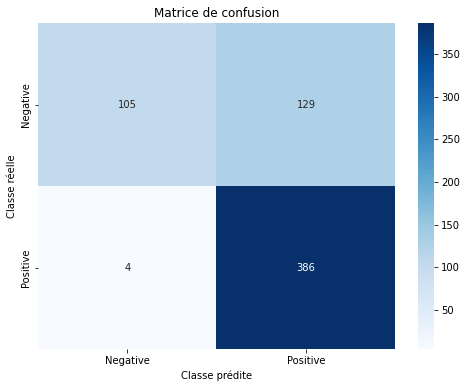

In [122]:
list_result = []
for i in range(0,10):
    print("For i=", i)
    accuracy, matrice, error = random_tree_forest(100, None, train_images, train_labels, test_images, test_labels, i)
    list_result.append({"estimator": 100, "max_depth": None, "random_state": i, "accuracy": accuracy, "matrice": matrice, "error": error})

For i= 10
Accuracy: 0.8012820512820513
Confusion matrix:
 [[117 117]
 [  7 383]]
Mean squared error: 0.4457779141208643


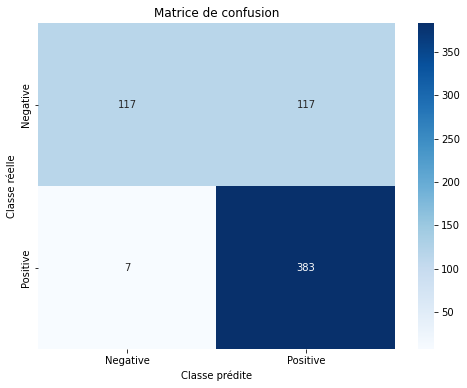

For i= 20
Accuracy: 0.7852564102564102
Confusion matrix:
 [[106 128]
 [  6 384]]
Mean squared error: 0.46340434799814917


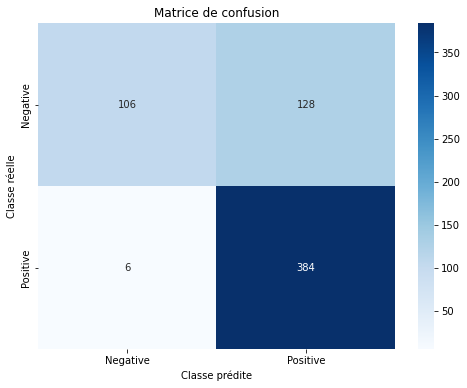

For i= 30
Accuracy: 0.7884615384615384
Confusion matrix:
 [[106 128]
 [  4 386]]
Mean squared error: 0.45993310550389993


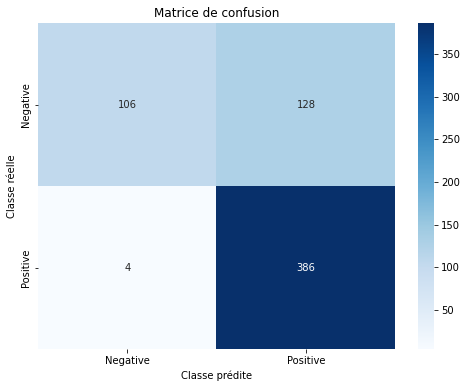

For i= 40
Accuracy: 0.7836538461538461
Confusion matrix:
 [[102 132]
 [  3 387]]
Mean squared error: 0.46513025470953173


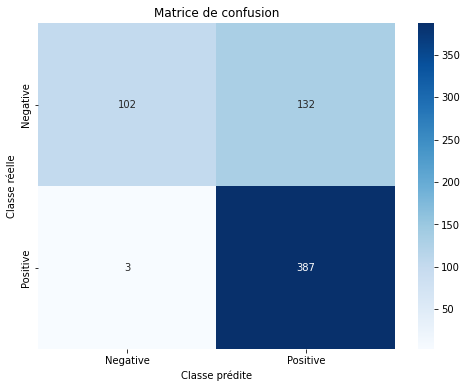

For i= 50
Accuracy: 0.7772435897435898
Confusion matrix:
 [[ 98 136]
 [  3 387]]
Mean squared error: 0.47197077267179405


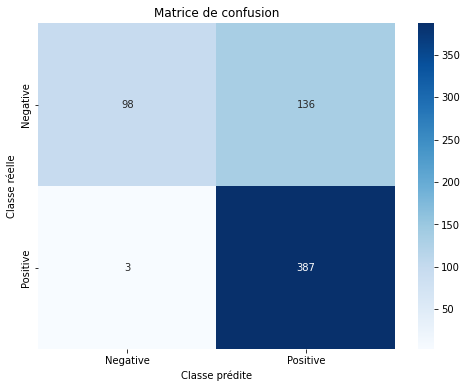

For i= 60
Accuracy: 0.7836538461538461
Confusion matrix:
 [[102 132]
 [  3 387]]
Mean squared error: 0.46513025470953173


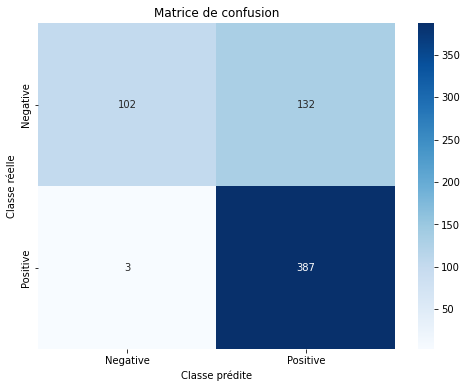

For i= 70
Accuracy: 0.7836538461538461
Confusion matrix:
 [[102 132]
 [  3 387]]
Mean squared error: 0.46513025470953173


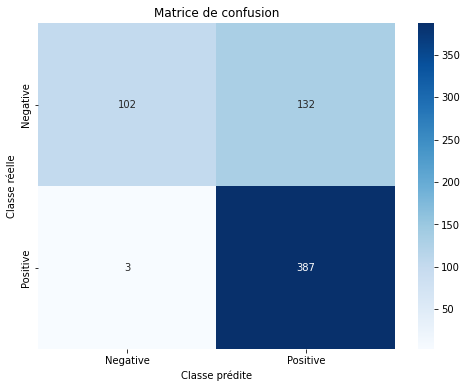

For i= 80
Accuracy: 0.7836538461538461
Confusion matrix:
 [[101 133]
 [  2 388]]
Mean squared error: 0.46513025470953173


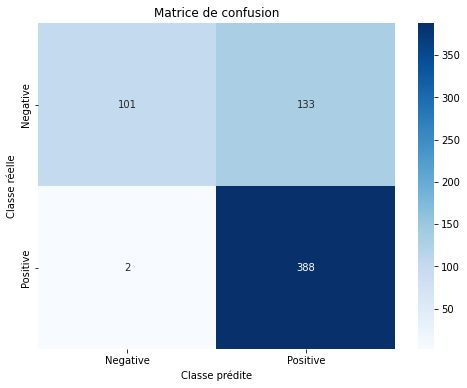

For i= 90
Accuracy: 0.7772435897435898
Confusion matrix:
 [[ 97 137]
 [  2 388]]
Mean squared error: 0.47197077267179405


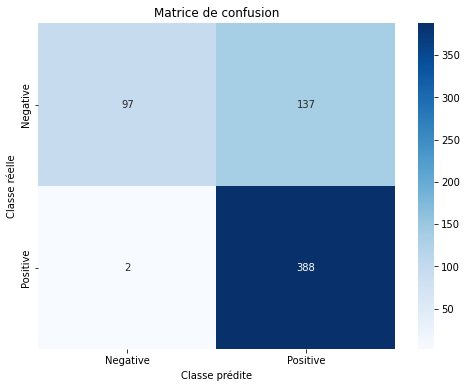

For i= 100
Accuracy: 0.7756410256410257
Confusion matrix:
 [[ 97 137]
 [  3 387]]
Mean squared error: 0.47366546671567095


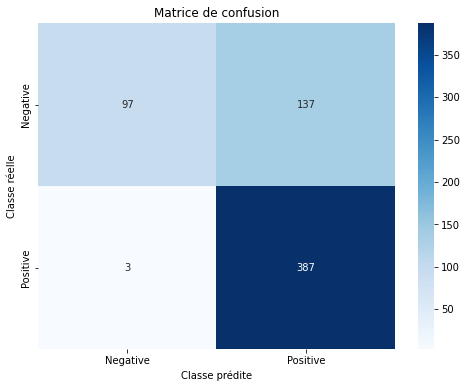

For i= 110
Accuracy: 0.7772435897435898
Confusion matrix:
 [[ 97 137]
 [  2 388]]
Mean squared error: 0.47197077267179405


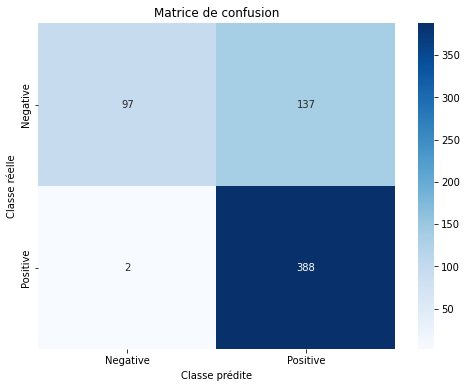

In [130]:
list_result = []
for i in range(10,120, 10):
    print("For i=", i)
    accuracy, matrice, error = random_tree_forest(i, None, train_images, train_labels, test_images, test_labels, 0)
    list_result.append({"estimator": i, "max_depth": None, "random_state": 0, "accuracy": accuracy, "matrice": matrice, "error": error})

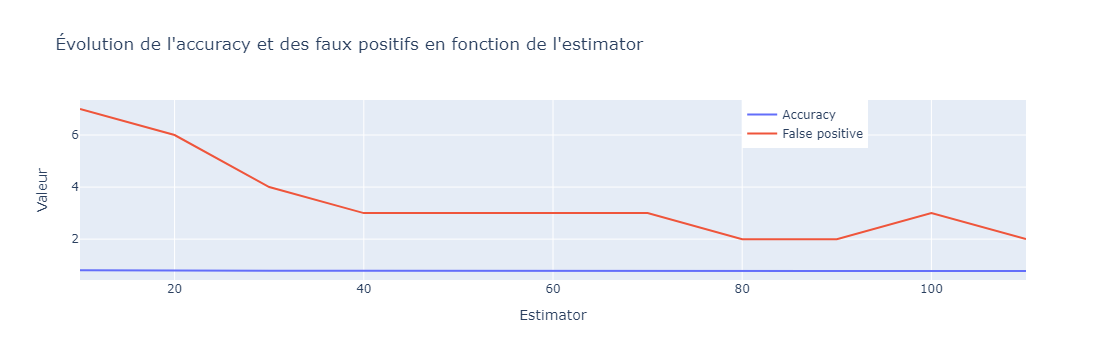

In [136]:
import pandas as pd
import plotly.graph_objects as go

df = pd.DataFrame(list_result)

# Fonction pour extraire la troisième valeur de la matrice
def get_third_value(matrix):
    return matrix[1][0]

# Ajouter la colonne avec la troisième valeur
df['third_value'] = df['matrice'].apply(get_third_value)

# Créer le graphique
fig = go.Figure()

# Ajouter la ligne pour l'accuracy
fig.add_trace(go.Scatter(
    x=df['estimator'],
    y=df['accuracy'],
    mode='lines',
    name='Accuracy'
))

# # Ajouter la ligne pour l'erreur
# fig.add_trace(go.Scatter(
#     x=df['estimator'],
#     y=df['error'],
#     mode='lines',
#     name='Error'
# ))

# Ajouter la ligne pour l'erreur
fig.add_trace(go.Scatter(
    x=df['estimator'],
    y=df['third_value'],
    mode='lines',
    name='False positive'
))

# Personnaliser le graphique
fig.update_layout(
    title='Évolution de l\'accuracy et des faux positifs en fonction de l\'estimator',
    xaxis=dict(title='Estimator'),
    yaxis=dict(title='Valeur'),
    legend=dict(x=0.7, y=1)
)

# Afficher le graphique
fig.show()

In [98]:
for i in [10, 100, 250, 500, 750, 1000, 2000]:
    print("\n====================")
    print("Estimators:", i)
    random_tree_forest(i, 5, train_images, train_labels, test_images, test_labels)


Estimators: 10
Accuracy: 0.7596153846153846
Confusion matrix:
 [[ 90 144]
 [  6 384]]
Mean squared error: 0.4902903378454601

Estimators: 100
Accuracy: 0.75
Confusion matrix:
 [[ 83 151]
 [  5 385]]
Mean squared error: 0.5

Estimators: 250
Accuracy: 0.7483974358974359
Confusion matrix:
 [[ 81 153]
 [  4 386]]
Mean squared error: 0.5016000040894778

Estimators: 500
Accuracy: 0.7451923076923077
Confusion matrix:
 [[ 79 155]
 [  4 386]]
Mean squared error: 0.5047847980156418

Estimators: 750
Accuracy: 0.7419871794871795
Confusion matrix:
 [[ 78 156]
 [  5 385]]
Mean squared error: 0.5079496239912188

Estimators: 1000
Accuracy: 0.7419871794871795
Confusion matrix:
 [[ 77 157]
 [  4 386]]
Mean squared error: 0.5079496239912188

Estimators: 2000
Accuracy: 0.7419871794871795
Confusion matrix:
 [[ 78 156]
 [  5 385]]
Mean squared error: 0.5079496239912188


In [105]:
import matplotlib.pyplot as plt

# Rappel precision and rock
def showRocCurve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [21]:
from Tool import tool
tool.convert2html("ZoidbergRandomForest.ipynb", "RandomForestDraft_28-03-23")

Convert ZoidbergRandomForest.ipynb to html
0
